### Importing Libraries 

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Files 

In [277]:
data =pd.read_csv(r'C:\Users\hornt\Documents\02.DS_Alma\03.Datasets\P1.0Boston_Housing.csv')

In [278]:
data.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Dataset Description:

The Boston Housing dataset includes the following features:

CRIM: Per capita crime rate by town.
ZN: Proportion of residential land zoned for large lots.
INDUS: Proportion of non-retail business acres per town.
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
NOX: Nitrogen oxide concentration (p arts per 10 million).
RM: Average number of rooms per dwelling.
AGE: Proportion of owner-occupied units built before 1940.
DIS: Weighted distance to employment centers.
RAD: Index of accessibility to radial highways.
TAX: Property tax rate.
PTRATIO: Pupil-teacher ratio.
B: Proportion of residents of African American descent.
LSTAT: Percentage of lower status population.

In [279]:
data.drop(['Unnamed: 0','CHAS'],axis =1,inplace =True)

### Data Description

In [280]:
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [281]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualisation 

In [282]:
col_lst = list(data.iloc[:,:-1].columns)
print(col_lst)

col_dict ={'CRIM': 'Per capita crime rate by town',
'ZN': 'Proportion of residential land zoned for large lots',
'INDUS': 'Proportion of non-retail business acres per town',
'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
'NOX': 'Nitrogen oxide concentration (p arts per 10 million)',
'RM': 'Average number of rooms per dwelling',
'AGE': 'Proportion of owner-occupied units built before 1940',
'DIS': 'Weighted distance to employment centers',
'RAD': 'Index of accessibility to radial highways',
'TAX': 'Property tax rate',
'PTRATIO': 'Pupil-teacher ratio',
'B': 'Proportion of residents of African American descent',
'LSTAT': 'Percentage of lower status population'}

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### Histogram 

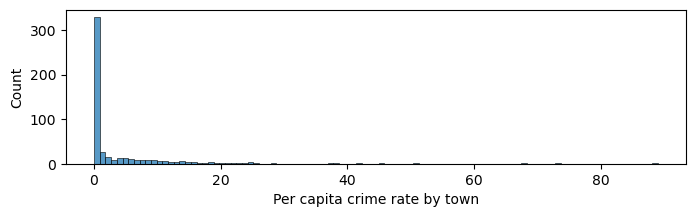

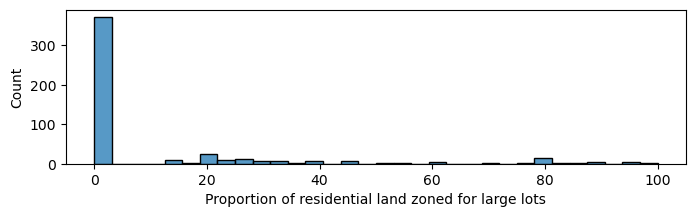

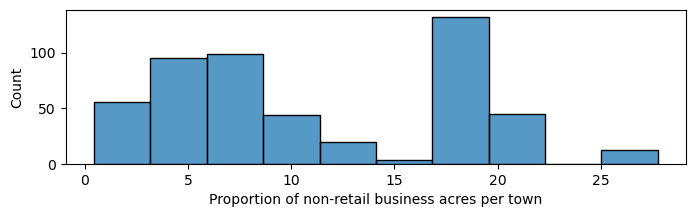

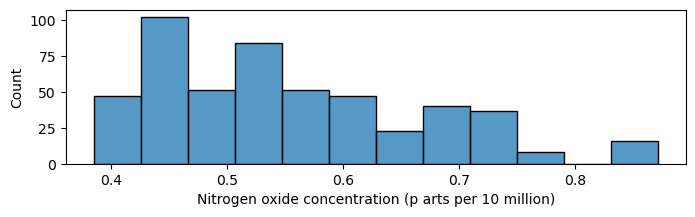

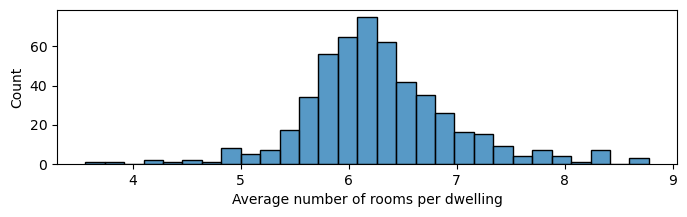

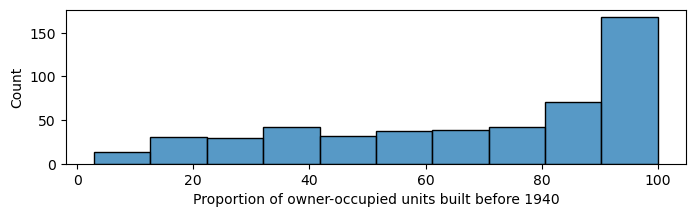

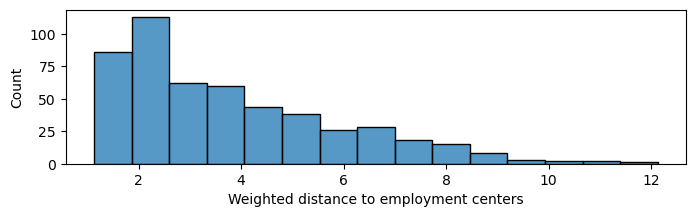

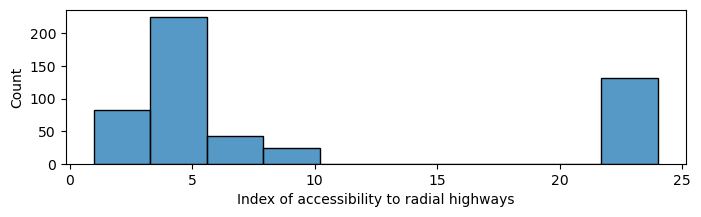

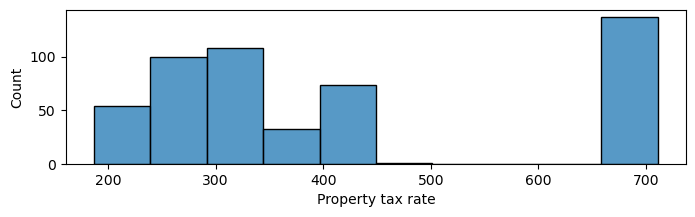

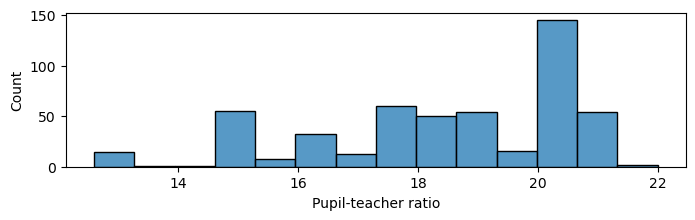

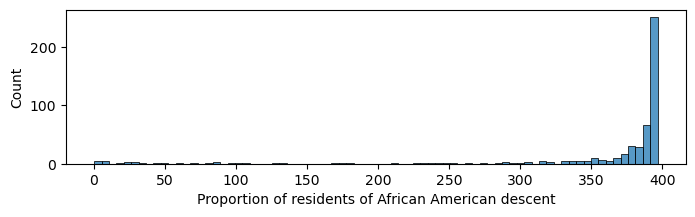

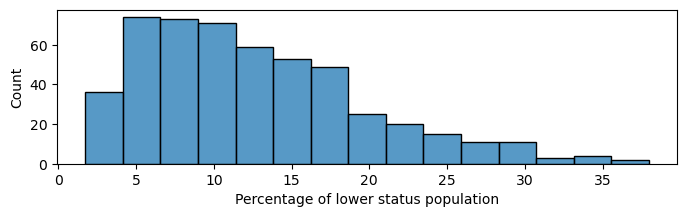

In [283]:
for i in range(len(col_lst)):
    plt.figure(figsize =(8,2))
    sns.histplot(data[col_lst[i]])
    plt.xlabel(col_dict[col_lst[i]])
    plt.show()

### Outlier Detection 

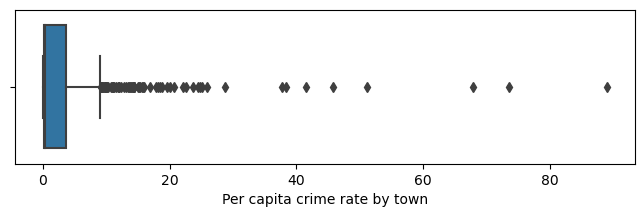

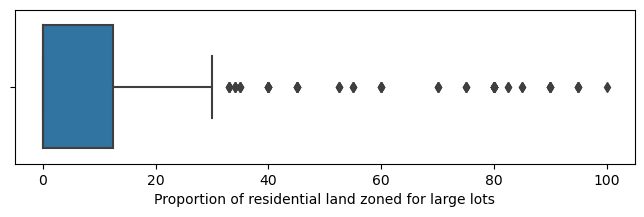

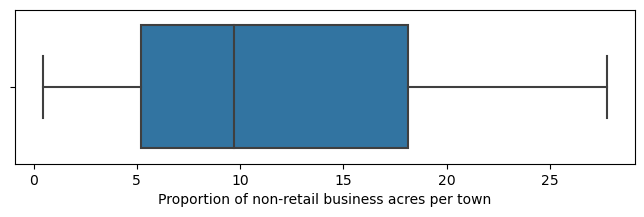

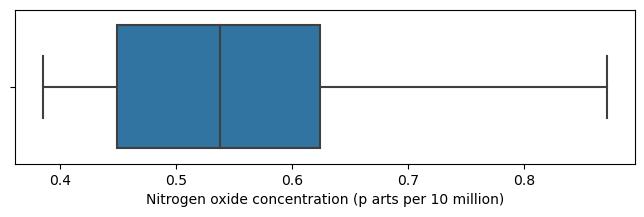

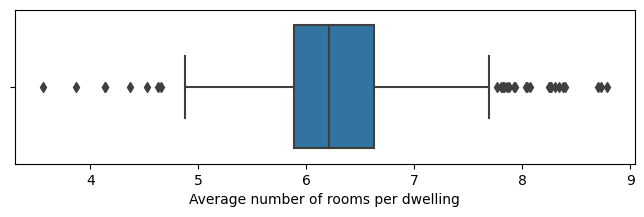

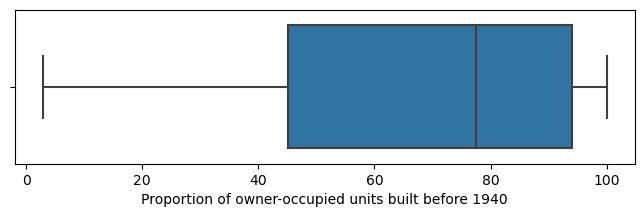

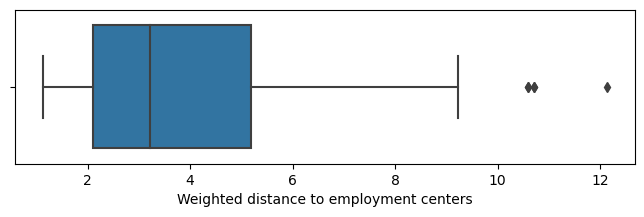

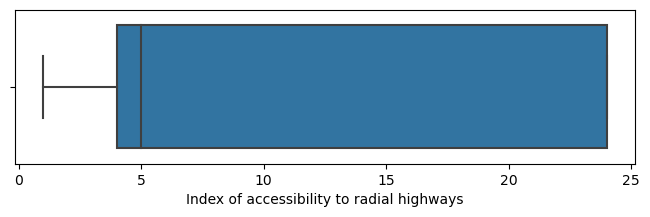

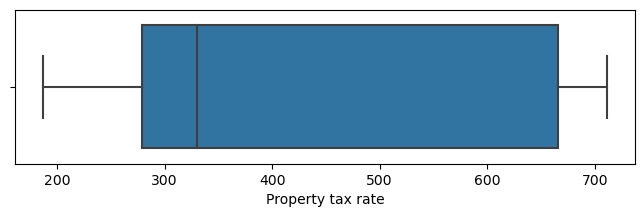

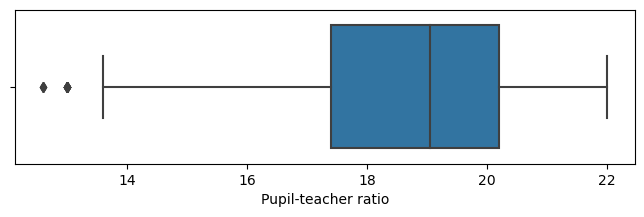

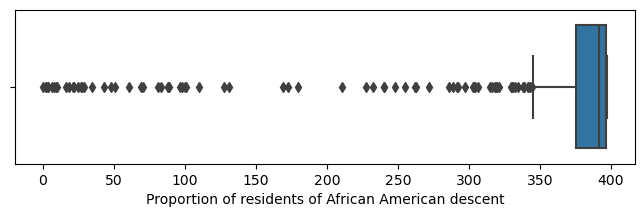

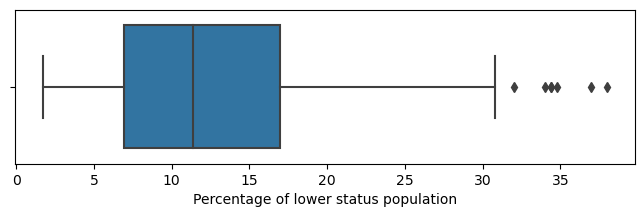

In [284]:
for i in range(len(col_lst)):
    plt.figure(figsize=(8,2))
    sns.boxplot(x =data[col_lst[i]])
    plt.xlabel(col_dict[col_lst[i]])
    plt.show()
    


In [164]:
lst =[]
for i in col_lst:
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_bound = data.quantile(0.25) - 1.5 * iqr
    upper_bound = data.quantile(0.75) + 1.5 * iqr
    outliers_iqr = data[((data < lower_bound) | (data > upper_bound)).any(axis=1)]
    print(outliers_iqr.shape)
    data = data[((data >= lower_bound) & (data <= upper_bound)).all(axis=1)]

(218, 13)
(126, 13)
(60, 13)
(15, 13)
(2, 13)
(0, 13)
(0, 13)
(0, 13)
(0, 13)
(0, 13)
(0, 13)
(0, 13)


In [285]:
print(data.shape)

(506, 13)


### Scaling for Interpretation 

In [286]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(data), columns=data.columns)


<Axes: >

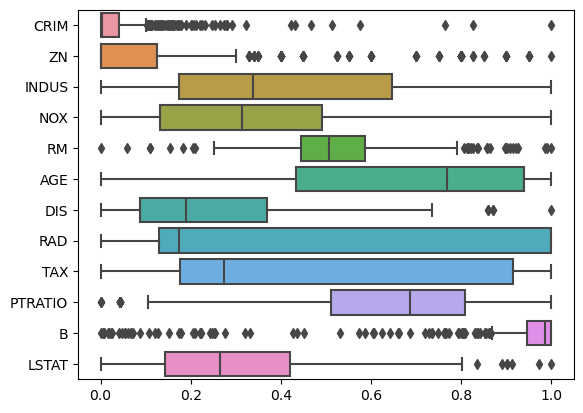

In [287]:
sns.boxplot(data=df_minmax[col_lst], orient="h",dodge=False)

<Axes: ylabel='Count'>

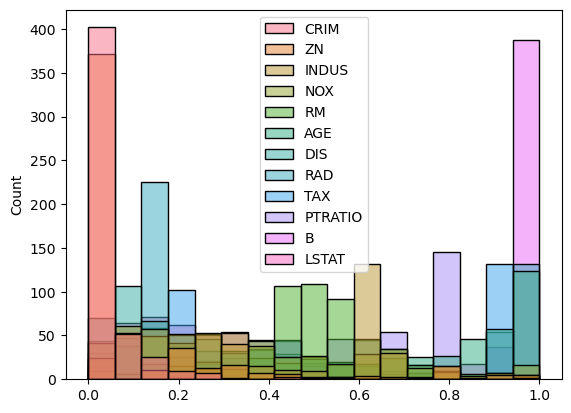

In [288]:
sns.histplot(df_minmax[col_lst])

### Correlation Visualisation 

C:\Users\hornt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


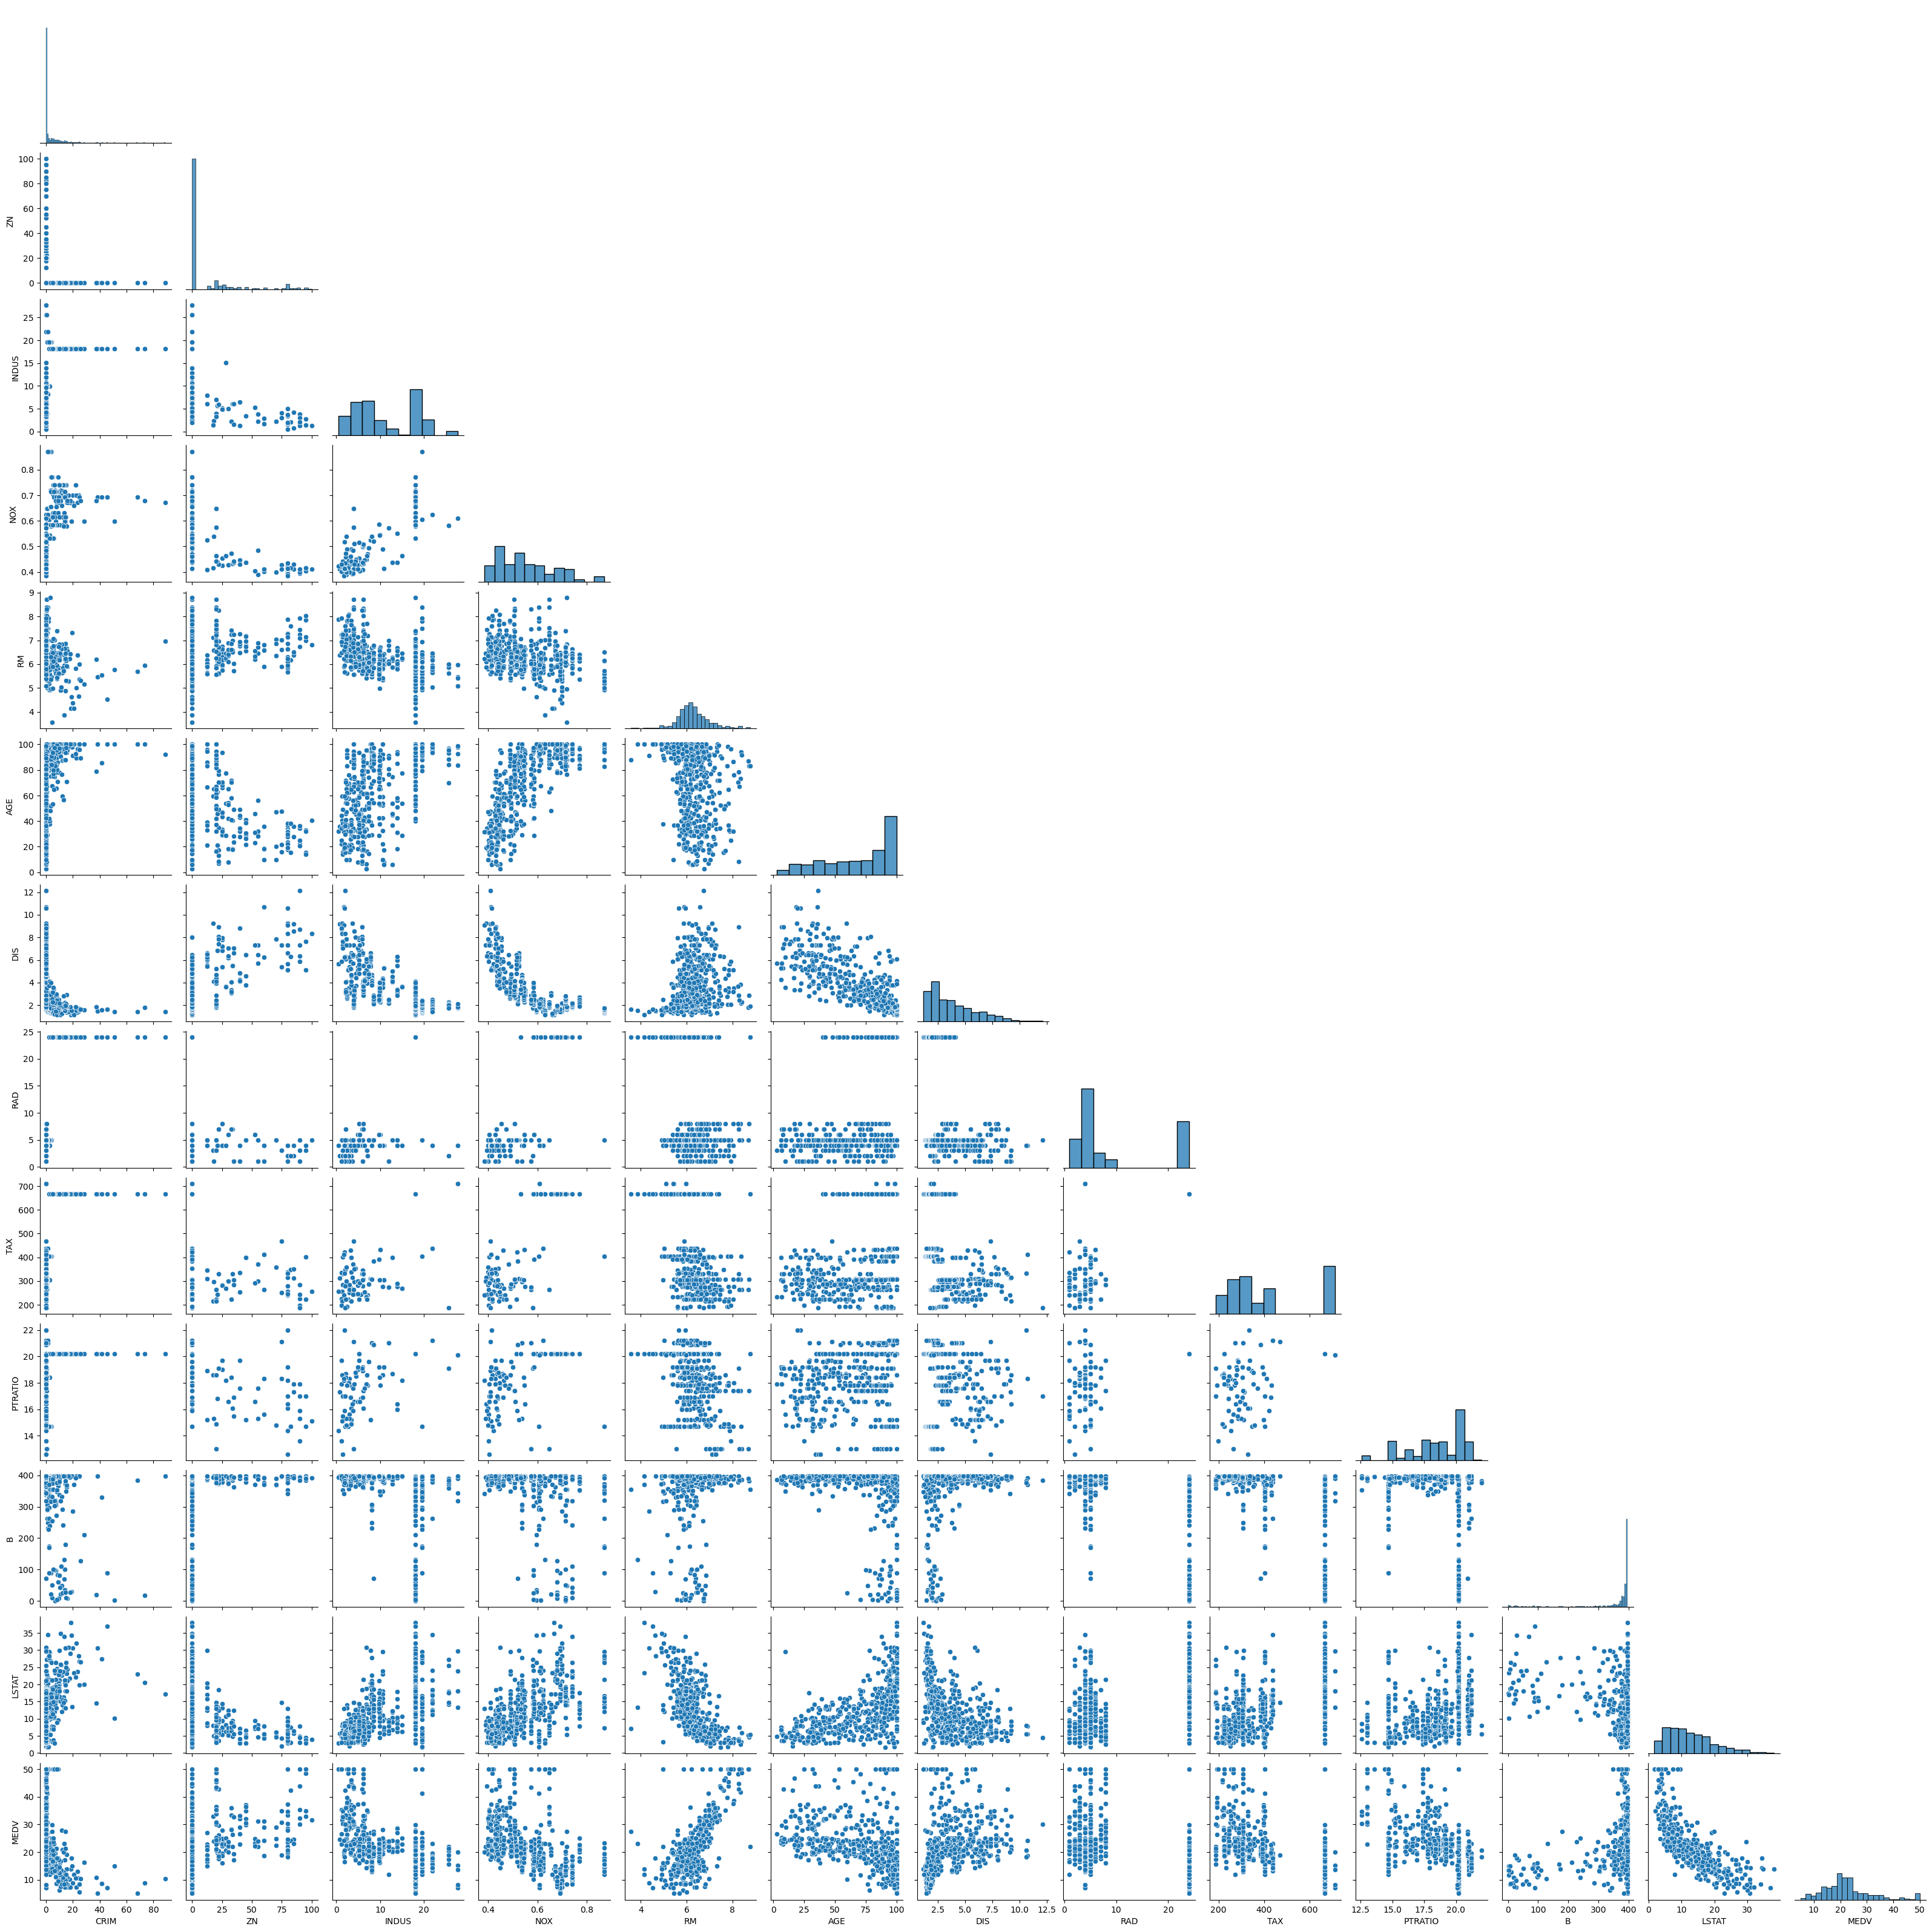

In [289]:
sns.pairplot(data,corner =True)
plt.show()

<Axes: >

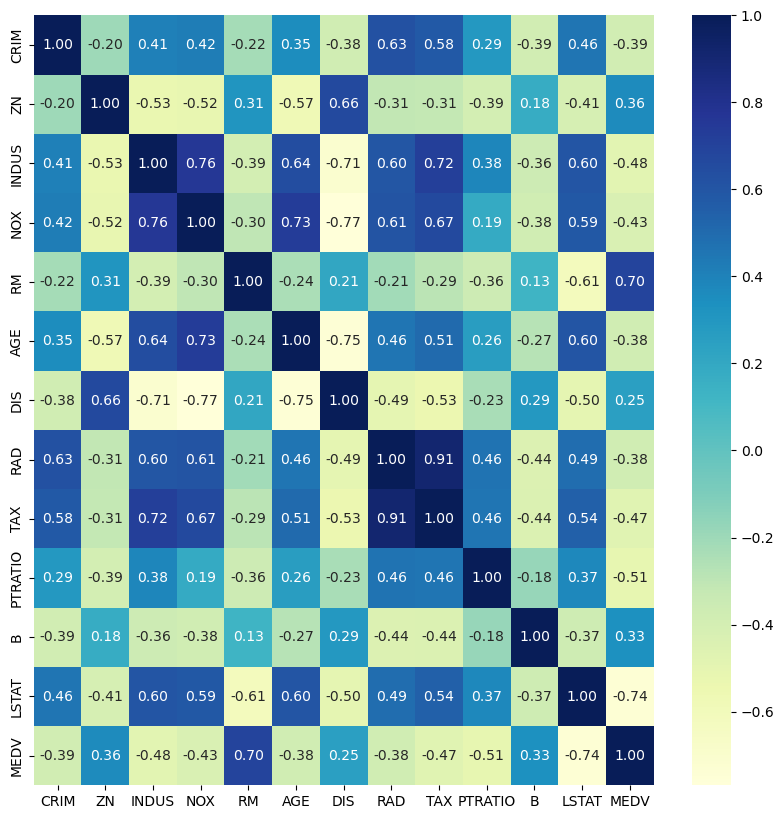

In [290]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot= True, cmap='YlGnBu',fmt ='0.2f')

In [171]:




# Feature Selection Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA





### Data training

In [291]:
X =data.iloc[:,:-1]
y =data.iloc[:,-1]

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 12) (102, 12) (404,) (102,)


In [293]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  =sc.transform(X_test)

In [294]:
#y_train = sc.fit_transform(y_train.values.reshape(y_train.shape[0],1))
#y_test = sc.transform(y_test.values.reshape(y_test.shape[0],1))

In [295]:
scaled_y = sc.fit_transform(y.values.reshape(data.shape[0],1))
#scaled_y
scaled_x = sc.fit_transform(X)
#scaled_x

In [299]:
print(cross_val_score(XGBRegressor(),X,y,cv =5))
print(cross_val_score(XGBRegressor(),scaled_x,scaled_y,cv =5))
print(cross_val_score(XGBRegressor(),scaled_x,y,cv =5))

[0.76046316 0.66052148 0.64441777 0.49972464 0.15132134]
[0.76041237 0.66707285 0.65368732 0.49086549 0.14112688]
[0.76046316 0.66052148 0.64441777 0.49972464 0.15132134]


### Model Selection 

### scoring parameter of cross_val_score can input the following

{'neg_mean_poisson_deviance', 'roc_auc_ovr', 'explained_variance', 'roc_auc', 'recall_samples', 'v_measure_score', 'neg_median_absolute_error', 'neg_mean_gamma_deviance', 'precision', 'recall_micro', 'jaccard', 'jaccard_macro', 'recall', 'recall_weighted', 'completeness_score', 'neg_brier_score', 'accuracy', 'precision_macro', 'neg_mean_absolute_percentage_error', 'adjusted_mutual_info_score', 'neg_negative_likelihood_ratio', 'homogeneity_score', 'f1', 'f1_micro', 'neg_mean_squared_error', 'fowlkes_mallows_score', 'rand_score', 'average_precision', 'roc_auc_ovo', 'max_error', 'recall_macro', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'adjusted_rand_score', 'neg_mean_squared_log_error', 'r2', 'roc_auc_ovo_weighted', 'neg_log_loss', 'normalized_mutual_info_score', 'jaccard_samples', 'top_k_accuracy', 'jaccard_weighted', 'matthews_corrcoef', 'balanced_accuracy', 'roc_auc_ovr_weighted', 'precision_weighted', 'f1_macro', 'precision_samples', 'precision_micro', 'f1_samples', 'jaccard_micro', 'mutual_info_score', 'positive_likelihood_ratio', 'f1_weighted'}

In [302]:
scorings =['r2','neg_root_mean_squared_error','neg_mean_absolute_error']
#define a dataframe 
CrossVal_Test =pd.DataFrame( columns=['Model','r2','MSE(-ve)','MAE(-ve)'])

def score_models(model_name, model,i):   
    score_lst =[]
    score_lst.append(model_name)
    for j in range(len(scorings)):
        score = cross_val_score(model, X_train , y_train, cv=5, scoring= scorings[j])
        #print(model,scorings[j],score)
            #print("{} average: {}".format(model_name, score.mean()))
        score_lst.append(score.mean())
    CrossVal_Test.loc[i] =score_lst

In [303]:
models = {"Linear Regression": LinearRegression(),
    "Lasso Regression" : Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "KNeighborsRegressor" :KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

for i in range(len([*models])):
    score_models([*models][i],models[[*models][i]],i)

CrossVal_Test.head(10)  

,Model,r2,MSE(-ve),MAE(-ve)
0,Linear Regression,0.720611,-4.863962,-3.440443
1,Lasso Regression,0.231054,-8.138382,-5.884134
2,Ridge Regression,0.718789,-4.885485,-3.398037
3,Random Forest,0.817897,-3.816252,-2.421333
4,DecisionTreeRegressor,0.654082,-5.538574,-3.510046
5,GradientBoostingRegressor,0.848881,-3.510581,-2.306261
6,KNeighborsRegressor,0.774641,-4.396276,-2.998656
7,XGBoost,0.835492,-3.714846,-2.400231


#### Listing Model Hyper Parameters

In [430]:
##  Lasso(alpha=0.001). Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 
##'precompute', 'random_state', 'selection', 'tol', 'warm_start'].

lasso_params = {'alpha':[1e-3, 1e-2, 1, 5, 10, 20, 30,45,50,75,100],
                'max_iter' : [10,100,100000]    }

ridge_params = {'alpha':[1e-3, 1e-2, 1, 5, 10, 20, 30,45,50,75,100],
                'solver':'auto',
                'max_iter' :[10,100,100000]  }

rf_params = { 
          'n_estimators': [1000],
          'max_depth': [6,7,8],                  #'max_depth': [4,5,6,7,8,9]
          'max_features': ['auto', 'sqrt'],  #'max_features': ['auto', 'sqrt']
          'min_samples_leaf': [4],           #'min_samples_leaf': [2,3,4,5,6,7]
          'min_samples_split' : [0.001],      #'min_samples_split' : [0.01]
         }

gbr_params = {
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : [150, 200],
    'max_depth' : [3, 4, 5]
}

xgb_params ={ 'learning_rate' : [0.1],
          'n_estimators' :[400], 'max_depth' : [3],}



#### Selecting Optimal Hyper Parameters 

In [431]:
# model selection
from sklearn.model_selection import RepeatedKFold,KFold,StratifiedKFold,cross_val_score,GridSearchCV

## listing models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [432]:
RKF =RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [433]:
lasso_search = GridSearchCV(Lasso(), param_grid = lasso_params, scoring='r2', cv=RKF)
ridge_search = GridSearchCV(Ridge(), param_grid = ridge_params, scoring='r2', cv=RKF)
rf_search = GridSearchCV(RandomForestRegressor(),param_grid =  rf_params, scoring='r2', cv=RKF)
gbr_search = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_params, scoring='r2', cv=RKF)
xgb_search =  GridSearchCV(XGBRegressor(), param_grid = xgb_params, scoring='r2', cv=RKF)


#### Running All Models -  On Train_Test Split

In [435]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [436]:
error = []
intercept=[]
coeff =[]

def train(models):

    for i in list(models.keys()):
        error_lst =[]
        x = models[i]
        x.fit(X_train, y_train)
        y_pred_x = x.predict(X_test)
        print(y_pred_x.shape)
        #error estimate
        error_lst.extend([i,np.sqrt(mean_squared_error(y_test, y_pred_x)),
                    mean_squared_error(y_test, y_pred_x),mean_absolute_error(y_test, y_pred_x), 
                    r2_score(y_test, y_pred_x)])
        error.append(error_lst)
        
        #plotting graph
        plt.figure(figsize =(4,4))
        plt.scatter(y_test, y_pred_x)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(x)
        #plt.savefig(str(x))
        plt.show()    
   

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.154e+03, tolerance: 3.798e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.040e+03, tolerance: 3.737e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.458e+03, toleranc

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.222e+03, tolerance: 3.798e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.112e+03, tolerance: 3.737e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.520e+03, toleranc

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.848e+03, tolerance: 3.798e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.671e+03, tolerance: 3.737e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.862e+03, toleranc

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.829e+01, tolerance: 3.798e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.435e+01, tolerance: 3.737e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.180e+01, toleranc

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.631e+00, tolerance: 3.929e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.281e+00, tolerance: 3.954e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.809e+00, toleranc

(102,)


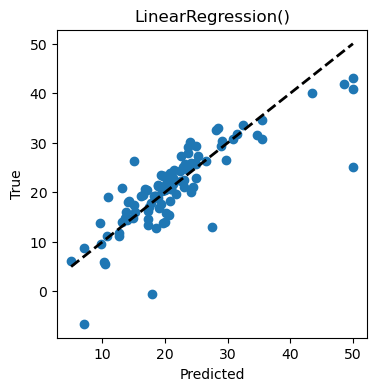

(102,)


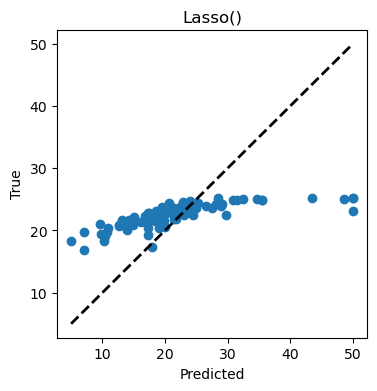

(102,)


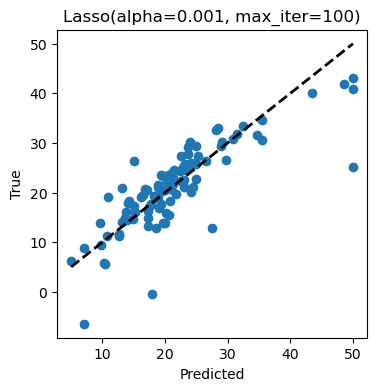

(102,)


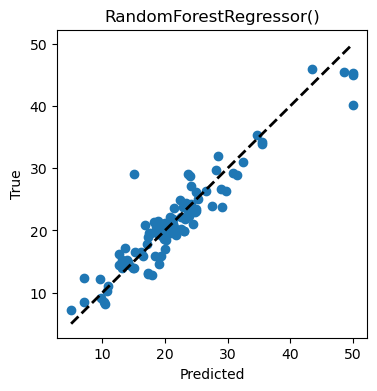

(102,)


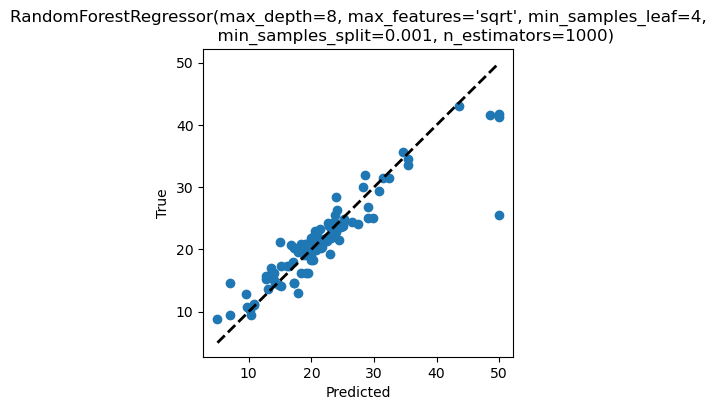

(102,)


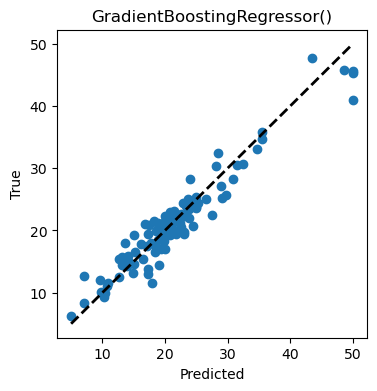

(102,)


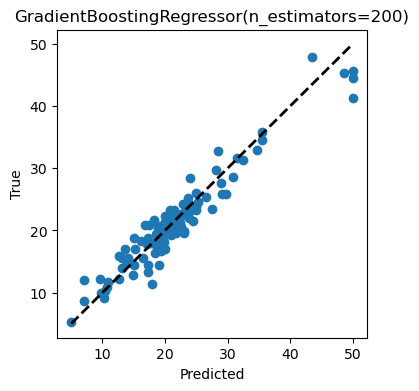

(102,)


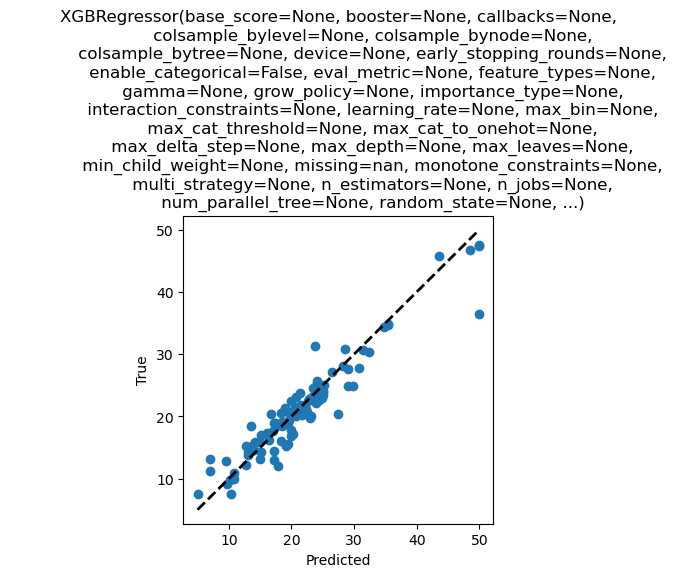

(102,)


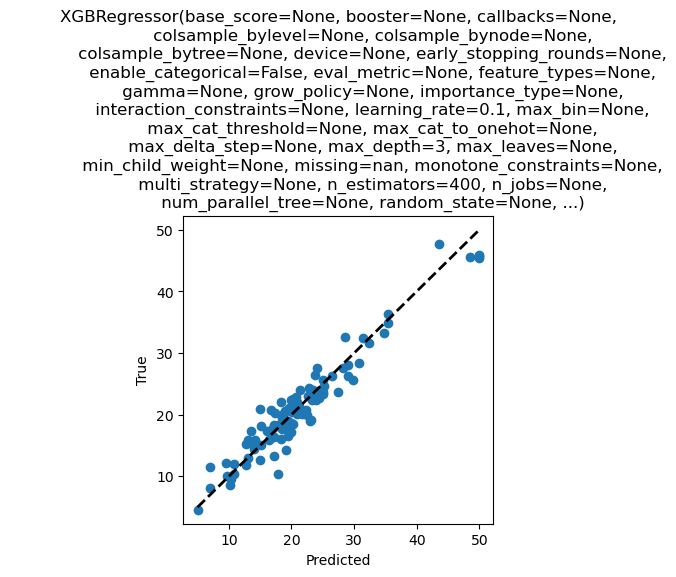

In [439]:
models = {"Linear Regression": LinearRegression(),
    "Lasso Regression" : Lasso(),
    "Lasso Regression (Tuned)" :lasso_search.fit(X,y).best_estimator_ ,
    "Random Forest": RandomForestRegressor(),
    "Random Forest (Tuned)": rf_search.fit(X,y).best_estimator_ ,
    #"DecisionTreeRegressor" : DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "GradientBoostingRegressor (Tuned)":gbr_search.fit(X,y).best_estimator_ ,
    #"KNeighborsRegressor" :KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "XGBoost (Tuned)": xgb_search.fit(X,y).best_estimator_ 

}

train(models)

                                Model      RMSE        MSE       MAE        R2
0                   Linear Regression  4.963405  24.635394  3.237242  0.664065
1                    Lasso Regression  7.379583  54.458243  5.114499  0.257392
2            Lasso Regression (Tuned)  4.962409  24.625504  3.231843  0.664200
3                       Random Forest  3.536373  12.505932  2.163802  0.829466
4           GradientBoostingRegressor  2.429534   5.902634  1.866673  0.919510
5                             XGBoost  2.330623   5.431804  1.810405  0.925930
6                   Linear Regression  4.963405  24.635394  3.237242  0.664065
7                    Lasso Regression  7.379583  54.458243  5.114499  0.257392
8            Lasso Regression (Tuned)  4.962409  24.625504  3.231843  0.664200
9                       Random Forest  2.877424   8.279569  2.089931  0.887097
10              Random Forest (Tuned)  3.532858  12.481087  2.151754  0.829804
11          GradientBoostingRegressor  2.508010   6.

Text(0.5, 1.0, 'Model accuracy comparison')

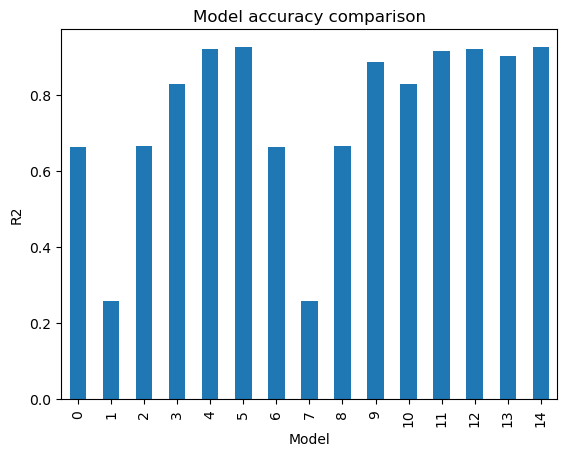

In [441]:
error
error_df = pd.DataFrame(error,columns =['Model','RMSE','MSE','MAE','R2'])
print(error_df)
error_df['R2'].plot.bar()

plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Model accuracy comparison')